# First things first: Understanding the Topic

Airbnb is an online market place for renting apartments, mostly for vacations. This marketplace connects people that want to rent out their privat apartments or homes and people who are searching for accommodations. It covers over 100.000 cities and 220 countries. Airbnb also provides several other offers that do not effect our work.
The datasets that are used in this analysis providing different information about Airbnb listings in Madrid. Let's have a look at the main dataset we want to use. But first we need to import necessary libaries for the data exploration and further machine learning algorithm. 

https://www.airbnb.com/d/howairbnbworks

# Importing the necessary libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Pre-processing

## Defining Data Sources

In [16]:
URL_LISTINGS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/listings.csv"
URL_LISTINGS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/listings.csv.gz"
URL_REVIEWS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/reviews.csv"
URL_REVIEWS_DETAILED = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/reviews.csv.gz"
URL_CALENDAR = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/data/calendar.csv.gz"
URL_NEIGHBOURHOODS = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.csv"
URL_NEIGHBOURHOODS_GEO = "http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-12-17/visualisations/neighbourhoods.geojson"

## Loading data sets into pandas

In [17]:
df_listings = pd.read_csv(URL_LISTINGS)
#df_listings_detailed = pd.read_csv(URL_LISTINGS_DETAILED, compression='gzip')
# df_reviews = pd.read_csv(URL_REVIEWS)
# df_reviews_detailed = pd.read_csv(URL_REVIEWS_DETAILED, compression='gzip')
df_calendar = pd.read_csv(URL_CALENDAR, compression='gzip')
df_neighbourhoods = pd.read_csv(URL_NEIGHBOURHOODS)

In [18]:
dfc_listings = df_listings.copy()
#dfc_listings_detailed = df_listings_detailed.copy()
#dfc_reviews = df_reviews.copy()
#dfc_reviews_detailed = df_reviews_detailed.copy()
dfc_calendar = df_calendar.copy()
dfc_neighbourhoods = df_neighbourhoods.copy()

## Data Exploration

Let's have a look at the dataset "df_listings". First of all we want to know the size, the columns and the type of the dataset.
You can see that there are 20352 listings in this dataset. For some variables there are missing values. For example the variable last_review only has 14474 Non-Null values. That means that only 71% of all observations including these values.

In [19]:
dfc_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,60,1,78,2020-09-20,0.59,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,31,4,33,2018-07-15,0.44,2,364
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,60,15,0,NaN,NaN,6,292
3,24805,Gran Via Studio Madrid,101471,Iraido,Centro,Universidad,40.42202,-3.70395,Entire home/apt,101,5,10,2020-03-01,0.14,1,88
4,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.58,1,358


In [20]:
dfc_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20352 entries, 0 to 20351
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20352 non-null  int64  
 1   name                            20349 non-null  object 
 2   host_id                         20352 non-null  int64  
 3   host_name                       20347 non-null  object 
 4   neighbourhood_group             20352 non-null  object 
 5   neighbourhood                   20352 non-null  object 
 6   latitude                        20352 non-null  float64
 7   longitude                       20352 non-null  float64
 8   room_type                       20352 non-null  object 
 9   price                           20352 non-null  int64  
 10  minimum_nights                  20352 non-null  int64  
 11  number_of_reviews               20352 non-null  int64  
 12  last_review                     

Secoundly a statistical description helps to give a feeling for the dataset. Here we only choose coloums for which this description makes sense.

In [21]:
dfc_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].describe(include='all')

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,20352.000000,20352.000000,20352.000000,20352.000000,20352.000000
mean,115.756732,6.120381,31.665537,11.183471,153.010711
std,354.502984,30.964229,63.130360,28.264229,149.119819
min,0.000000,1.000000,0.000000,1.000000,0.000000
25%,35.000000,1.000000,0.000000,1.000000,0.000000
50%,59.000000,2.000000,4.000000,2.000000,90.000000
75%,100.000000,3.000000,32.000000,7.000000,340.000000
max,9999.000000,1125.000000,678.000000,197.000000,365.000000


## Removing unnecessery dimensions

In [22]:
rows_before_cleanup = dfc_listings.shape[0]
columns_before_cleanup =  dfc_listings.shape[1]
#Removing columns which have no pourpose in our application
dfc_listings.drop(labels = ['name','host_name','last_review'], axis=1, inplace=True)

## Missing values

As we can see in the description of the dataset, there are very few missing values. Because the dataset is relatively big, we can just remove the rows with missing values.

In [23]:
#Show all values which have NaN values in columbs besides number_of_reviews, last_review, reviews_per_month, where NaN values are legitimate
print(dfc_listings[dfc_listings.drop(labels = ['number_of_reviews', 'reviews_per_month'], axis = 1, inplace = False).isna().any(axis=1)].shape)

#Since the those are just 8 of more than 20000, the rows can just be removed:
dfc_listings.drop(dfc_listings[dfc_listings.drop(labels = ['number_of_reviews', 'reviews_per_month'], axis = 1, inplace = False).isna().any(axis=1)].index, axis = 0, inplace = True)


dfc_listings['reviews_per_month'].fillna(0, inplace=True)
dfc_listings.info()

(0, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20352 entries, 0 to 20351
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20352 non-null  int64  
 1   host_id                         20352 non-null  int64  
 2   neighbourhood_group             20352 non-null  object 
 3   neighbourhood                   20352 non-null  object 
 4   latitude                        20352 non-null  float64
 5   longitude                       20352 non-null  float64
 6   room_type                       20352 non-null  object 
 7   price                           20352 non-null  int64  
 8   minimum_nights                  20352 non-null  int64  
 9   number_of_reviews               20352 non-null  int64  
 10  reviews_per_month               20352 non-null  float64
 11  calculated_host_listings_count  20352 non-null  int64  
 12  availability_365        

## Outliers

To get an overview of the numerical data, we start with boxplots:

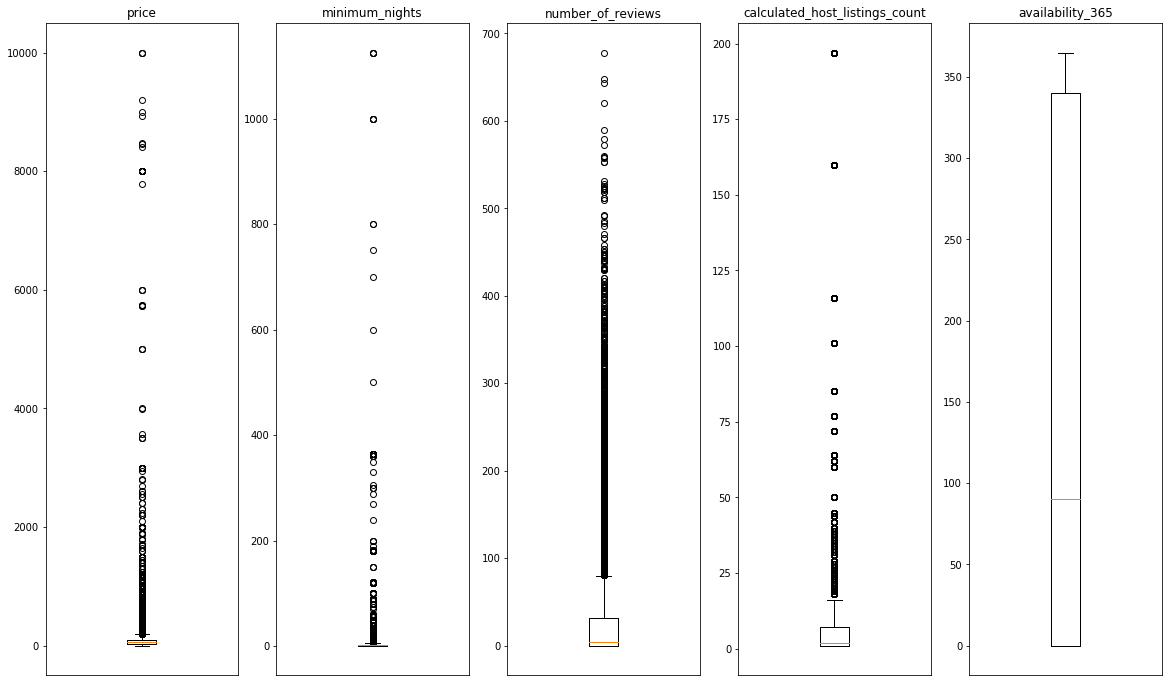

In [24]:
fig1 = plt.figure(figsize=(20, 12))
ax1 = fig1.add_subplot(1,5,1)
ax2 = fig1.add_subplot(1,5,2)
ax3 = fig1.add_subplot(1,5,3)
ax4 = fig1.add_subplot(1,5,4)
ax5 = fig1.add_subplot(1,5,5)

ax1.boxplot(dfc_listings['price'])
ax1.set_title('price')
ax1.get_xaxis().set_visible(False)

ax2.boxplot(dfc_listings['minimum_nights'])
ax2.set_title('minimum_nights')
ax2.get_xaxis().set_visible(False)

ax3.boxplot(dfc_listings['number_of_reviews'])
ax3.set_title('number_of_reviews')
ax3.get_xaxis().set_visible(False)

ax4.boxplot(dfc_listings['calculated_host_listings_count'])
ax4.set_title('calculated_host_listings_count')
ax4.get_xaxis().set_visible(False)

ax5.boxplot(dfc_listings['availability_365'])
ax5.set_title('availability_365')
ax5.get_xaxis().set_visible(False)

fig1.show()


As we can see in the boxplot, the number of outliers is quite significant in regards to price, minimum_nights, number_of_reviews and the calculated_host_listings_count. If we were to remove all the outliers, the dataset would shrink by more than half (20344 --> 9356). Since that is a unnecessary removal of otherwise good data, we decided to not remove the outliers in number_of_reviews and calculated_host_listings_count. Since all the 

In [25]:
#Remove prices which are 0:
dfc_listings = dfc_listings[~(dfc_listings['price'] == 0)]
#Remove availibility which are 0:
#dfc_listings = dfc_listings[~(dfc_listings['availability_365'] == 0)] #TODO removing the zero availability_365, removes 6000 data points 

In [26]:
#Removing outliers in the price and minimum_nights columbs by using the IQR
#remove price outliers
Q1_price = dfc_listings['price'].quantile(0.25)
Q3_price = dfc_listings['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

#remove minimum_nights 
Q1_minimum_nights = dfc_listings['minimum_nights'].quantile(0.25)
Q3_minimum_nights = dfc_listings['minimum_nights'].quantile(0.75)
IQR_minimum_nights = Q3_minimum_nights - Q1_minimum_nights

dfc_listings = dfc_listings[(dfc_listings['price']  >= Q1_price - 1.5 * IQR_price) & (dfc_listings['price']  <= Q3_price + 1.5 * IQR_price) & (dfc_listings['minimum_nights']  >= Q1_minimum_nights - 1.5 * IQR_minimum_nights) & (dfc_listings['minimum_nights']  <= Q3_minimum_nights + 1.5 * IQR_minimum_nights)]

print('The data set size was reduced from (' + str(rows_before_cleanup) + ', ' + str(columns_before_cleanup) + ') to (' + str(dfc_listings.shape[0]) + ', ' + str(dfc_listings.shape[1]) + ') rows.')

The data set size was reduced from (20352, 16) to (16050, 13) rows.


### Data Visualization

For exploring the data visual we will use histograms. Since they are suitable for a holistic view, where we can probe into the data for each attribute.

<Figure size 1440x720 with 0 Axes>

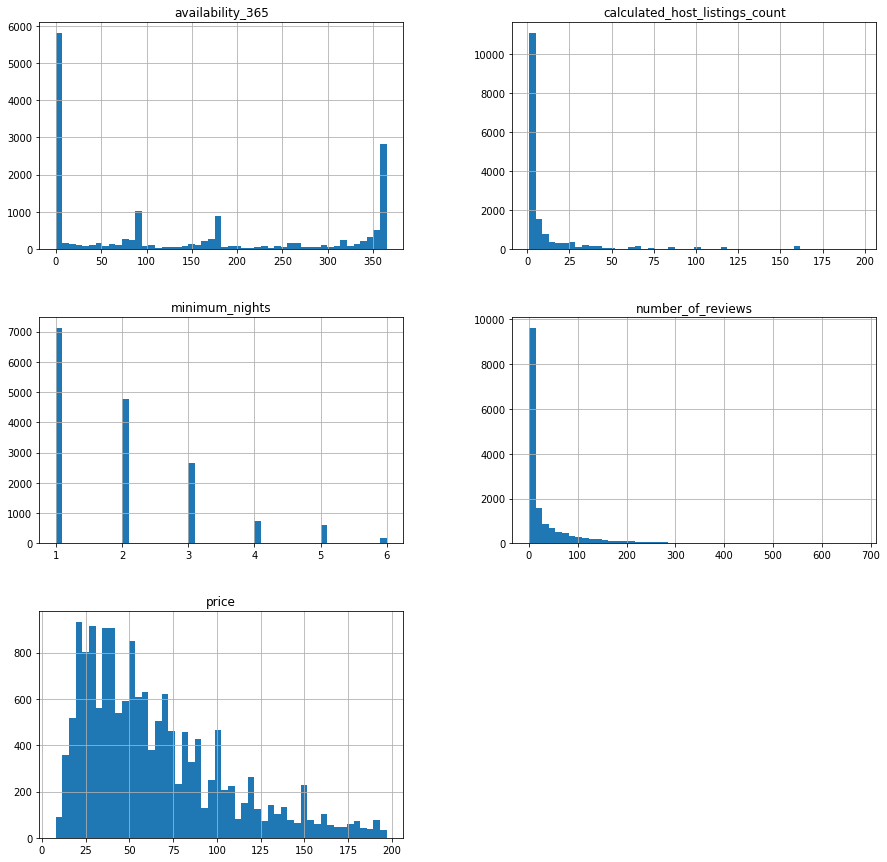

In [69]:
fig2 = plt.figure(figsize=(20, 10), facecolor="lightgray", tight_layout=False, constrained_layout=False)
fig2.suptitle('Histograms', fontsize=50, va="top")
fig2.add_subplot.dfc_listings[['price','minimum_nights','number_of_reviews','calculated_host_listings_count', 'availability_365']].hist(bins=50, figsize=(15,15))
fig2.show()

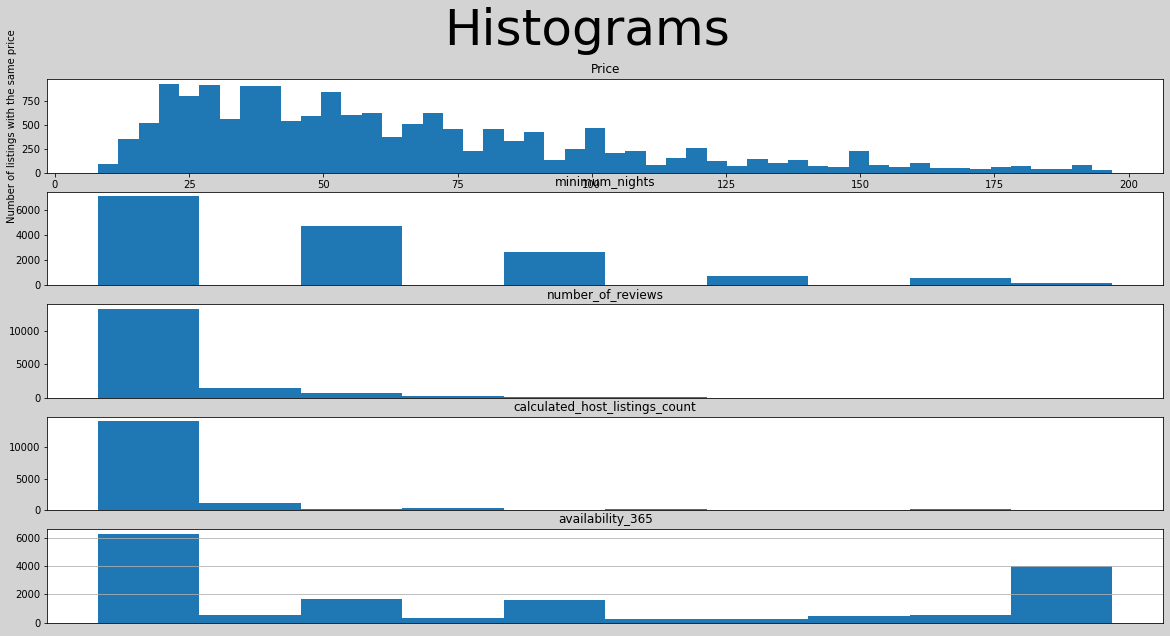

In [68]:
fig2 = plt.figure(figsize=(20, 10), facecolor="lightgray", tight_layout=False, constrained_layout=False)
fig2.suptitle('Histograms', fontsize=50, va="top")
ax1 = fig2.add_subplot(3,2,1)
ax2 = fig2.add_subplot(5,2,2)
ax3 = fig2.add_subplot(5,2,3)
ax4 = fig2.add_subplot(5,2,4)
ax5 = fig2.add_subplot(5,2,5)


ax1.hist(dfc_listings['price'], bins=50)
ax1.set_title('Price')
ax1.set_xlabel('Price of listing')
ax1.set_ylabel('Number of listings with the same price')

ax2.hist(dfc_listings['minimum_nights'])
ax2.set_title('minimum_nights')
ax2.get_xaxis().set_visible(False)

ax3.hist(dfc_listings['number_of_reviews'])
ax3.set_title('number_of_reviews')
ax3.get_xaxis().set_visible(False)

ax4.hist(dfc_listings['calculated_host_listings_count'])
ax4.set_title('calculated_host_listings_count')
ax4.get_xaxis().set_visible(False)

ax5.hist(dfc_listings['availability_365'])
ax5.set_title('availability_365')
ax5.get_xaxis().set_visible(False)
plt.grid()
fig2.show()